In [42]:
# Importing liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# read our dataset from the csv insurance file

df = pd.read_csv("./insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
# since we need to predict the charges then we have to encode string features to numericals.
# represent sex and smoker as binary values (0 or 1)
df["sex_encoded"] = df["sex"].replace(to_replace=["male", "female"], value=[1, 0], regex=True)
df["smoker_encoded"] = df["smoker"].replace(to_replace=["yes", "no"], value=[1, 0], regex=True)

# represent region as decimals from 0 to 3
df["region_encoded"] = df["region"].replace(to_replace=["northeast", "northwest", "southeast", "southwest"], value=[0, 1, 2, 3], regex=True)
df

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,3


In [45]:
# selecting the features
X = df[["age", "sex_encoded", "bmi", "children", "smoker_encoded", "region_encoded"]] #features

#selecting outcomes
y = df["charges"]

print(X)
print(y)

      age  sex_encoded     bmi  children  smoker_encoded  region_encoded
0      19            1  27.900         0               1               3
1      18            1  33.770         1               0               2
2      28            1  33.000         3               0               2
3      33            1  22.705         0               0               1
4      32            1  28.880         0               0               1
...   ...          ...     ...       ...             ...             ...
1333   50            1  30.970         3               0               1
1334   18            1  31.920         0               0               0
1335   18            1  36.850         0               0               2
1336   21            1  25.800         0               0               3
1337   61            1  29.070         0               1               1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520

In [46]:
# split the data into train and test sets to create train, test sets
# let test_size equal 0.25 and train_size will be automatically the complement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
# creating model (linear regression model)
model = LinearRegression()

# fitting model with training data
model.fit(X_train, y_train)

# making predictions on the test data set
y_predictions = model.predict(X_test)

In [49]:
# calculating the  loss error
MSE = mean_squared_error(y_test, y_predictions)

# calculating the  goodness of fit
R2 = r2_score(y_test, y_predictions)

# computing the MSE and R2 to compare them with the upcoming algorithm from scratch
print(f"Mean squared error = {MSE}")
print(f"Coefficient of determination = {R2}")

Mean squared error = 35157419.68864379
Coefficient of determination = 0.767001430584461


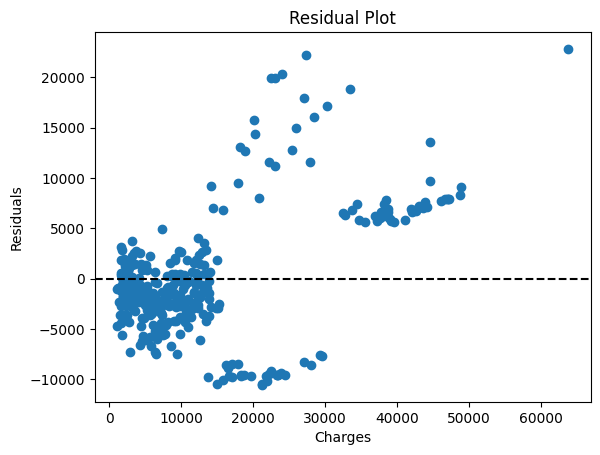

In [56]:
# calculate and plot the residual to represent the variation
residuals = y_test - y_predictions # actual - predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.set_title("Residual Plot 1")
ax.set_xlabel("Charges")
ax.set_ylabel("Residuals")
ax.axhline(0, color="black", linestyle="--")


# Linear Regression (Python from scratch)

In [116]:
# normal equation
# creating x_prime by concatinating a col of ones to x matrix
X_prime = np.append(X.to_numpy(), np.ones((X.to_numpy().shape[0], 1)), axis=1)
XT_X = np.dot(X_prime.T,X_prime)
w_prime = np.dot(np.dot(np.linalg.inv(XT_X),X_prime.T),y.values)

print(f"Mean squared error = {mean_squared_error(y, np.dot(X_prime,w_prime))}")
print(f"Coefficient of determination = {r2_score(y, np.dot(X_prime,w_prime))}")

Mean squared error = 37005395.750507504
Coefficient of determination = 0.7474771588119513


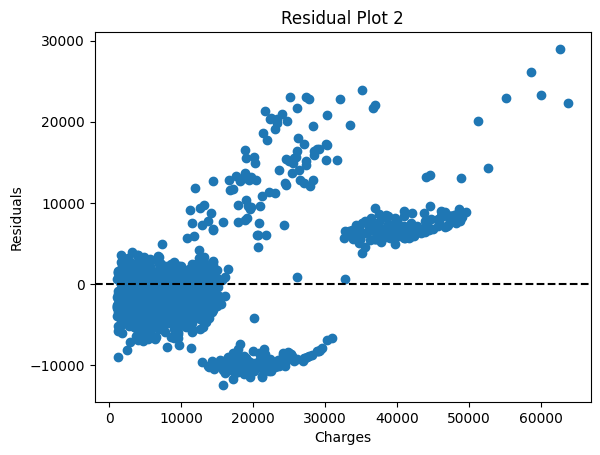

In [117]:
# calculate and plot the residual to represent the variation
residuals = y - np.dot(X_prime,w_prime) # actual - predicted

fig, ax = plt.subplots()
ax.scatter(y, residuals)
ax.set_title("Residual Plot 2")
ax.set_xlabel("Charges")
ax.set_ylabel("Residuals")
ax.axhline(0, color="black", linestyle="--")

## Sckit-learn (sklearn) vs Python from scratch
if we see the values of MSE and R2, we will notice that the R2 is greater that means the line fitting is better in the case of using sckit-learn. And the MSE is less in the case of the sckit-learn, thus, the sklearn is efficient than writing the function from the scratch. Despite of using normal equations because dataset weren't that big.

sckit-learn was easier, the process sounded fixed and faster.

from scratch depended on understanding the math -final equations- behind the concept.